In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import sys
import os

# Add the parent directory to the system path
parent_directory = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(parent_directory)

from plotting import plot_phase_plane, plot_velocity_expression

dataset = "forebrain"
cell_type_key = "Clusters"
model_name = "lsvelo"
K = 31

adata = sc.read_h5ad(f"../../benchmark/{model_name}/{dataset}/{model_name}_{dataset}.h5ad")
if dataset == "ivelo":
    pseudotime = np.load(f"../../benchmark/ivelo/pseudotimes/{dataset}_pseudotime.py")
    adata.obs["pseudotime"] = pseudotime
    pseudotime_key = "pseudotime"
else:
    pseudotime_key = "isomap_1"

os.makedirs(f"plots/{dataset}/{model_name}/", exist_ok=True)

In [ ]:
adata.obs["pseudotime"] *=-1
sc.pl.umap(adata, color=pseudotime_key)

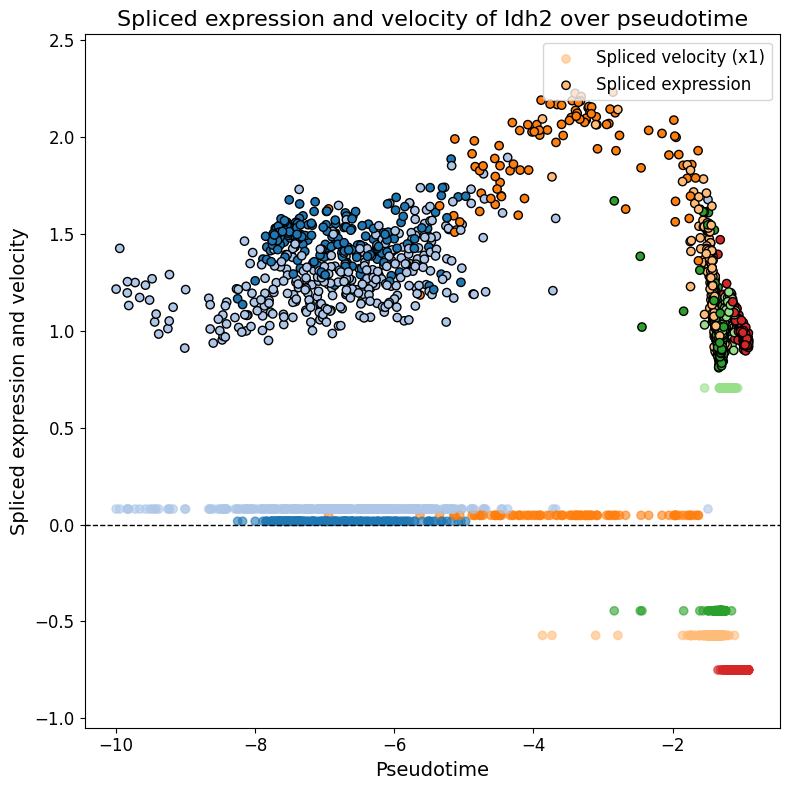

In [19]:
gene_name = "Idh2"
plot_type = "spliced"

plot_velocity_expression(adata,
                         scale_velocity=1,
                         shift_expression=0,
                         gene_name=gene_name, plot_type=plot_type, 
                         cell_type_key=cell_type_key, 
                         save_path=f"plots/{dataset}/{model_name}/{gene_name}_{plot_type}.png", 
                         save_plot=True,
                         plot_shift=True,
                         reverse_pseudotime=True,
                         pseudotime_key="pseudotime",
                         legend_loc="upper right")